In [1]:
pip install yellowbrick

In [2]:
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from yellowbrick.classifier import ClassificationReport
from pandas import Series, DataFrame
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

## Exploratory Data Analysis

In [3]:
data=pd.read_csv("creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20128 entries, 0 to 20127
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    20128 non-null  int64  
 1   V1      20128 non-null  float64
 2   V2      20128 non-null  float64
 3   V3      20128 non-null  float64
 4   V4      20128 non-null  float64
 5   V5      20128 non-null  float64
 6   V6      20128 non-null  float64
 7   V7      20128 non-null  float64
 8   V8      20128 non-null  float64
 9   V9      20128 non-null  float64
 10  V10     20128 non-null  float64
 11  V11     20128 non-null  float64
 12  V12     20128 non-null  float64
 13  V13     20128 non-null  float64
 14  V14     20128 non-null  float64
 15  V15     20128 non-null  float64
 16  V16     20128 non-null  float64
 17  V17     20128 non-null  float64
 18  V18     20128 non-null  float64
 19  V19     20128 non-null  float64
 20  V20     20128 non-null  float64
 21  V21     20128 non-null  float64
 22

In [6]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(('Total number of Transactions are {}'.format(Total_transactions)))
print(('Number of Normal Transactions are {}'.format(normal)))
print(('Number of fraudulent Transactions are {}'.format(fraudulent)))
print(('Percentage of fraud Transactions is {}'.format(fraud_percentage)))

Total number of Transactions are 20128
Number of Normal Transactions are 19636
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 2.51


In [7]:
fraud = data[data["Class"] == 1] 
normal = data[data["Class"] == 0]
fraud.describe()
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
540,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
621,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4918,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6107,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20123,169142,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
20124,169347,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
20125,169351,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
20126,169966,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


## Data cleaning

In [8]:
def missing_values(data):
        mis_val = data.isnull().sum()        
        mis_val_percent = 100 * mis_val / len(data)        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)        
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})        
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)        
        print ("Dataframe has " + str(data.shape[1]) + " columns.\n"+"There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")        
        return mis_val_table_ren_columns
    
missing_values(data)

Dataframe has 31 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [9]:
data.drop(['Time'], axis=1, inplace=True)

In [10]:
data.drop_duplicates(inplace=True)

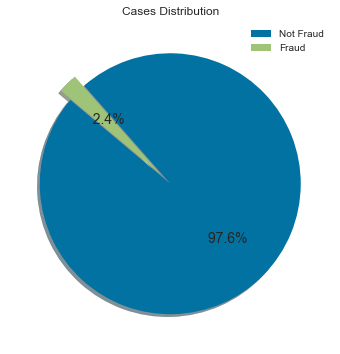

In [11]:
plt.figure(figsize=(6,6))
explode = [0,0.1]
plt.pie(data['Class'].value_counts(),explode=explode,autopct='%5.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Not Fraud','Fraud'])
plt.title('Cases Distribution')
plt.axis('off');

## Data Preprocessing

#### Scaling

In [13]:
X = data.drop('Class', axis = 1)
y = data['Class']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)
X_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.496613,-0.227135,0.903452,0.639984,-0.078886,0.308190,0.269220,0.051189,-0.145518,0.259942,...,0.312886,0.023440,0.637146,-0.132315,0.107272,0.033351,-0.431558,0.275422,-0.115923,0.382148
1,0.740743,-0.019350,-0.224012,0.054396,0.174627,-0.100166,0.084660,0.042235,-0.594581,0.092995,...,-0.179046,-0.201129,-0.756744,0.251936,-0.583361,0.120246,0.166556,-0.059678,0.024145,-0.344316
2,-0.495908,-1.004112,0.540390,0.011343,-0.183818,1.311270,0.589104,0.149298,-1.507795,0.335621,...,0.732789,0.311696,1.388214,1.718314,-1.176640,-0.992768,-0.336588,-0.168689,-0.267429,1.514588
3,-0.305779,-0.296070,0.549802,-0.771374,0.129869,0.896506,0.268067,0.234752,-1.415236,0.165548,...,-0.392329,-0.073971,0.222612,-0.277200,-2.002284,1.200405,-0.493863,0.108895,0.207106,0.253003
4,-0.398865,0.355587,0.433588,0.025985,-0.122718,0.033479,0.474033,-0.191968,0.183695,0.688877,...,0.554068,0.033048,1.428667,-0.181279,0.233487,-0.719173,0.881230,0.477280,0.808825,-0.011566


## Model Training

In [14]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit(X_train).transform(X_train)
X_test=scaler.fit(X_test).transform(X_test)
k=KNeighborsClassifier()
k.fit(X_train,y_train)
result=k.predict(X_test)
print('Accuracy score  is {}'.format(accuracy_score(y_test,result)))
print('F1 score  is {}'.format(f1_score(y_test,result)))

Accuracy score  is 0.9938612645794966
F1 score  is 0.8557692307692307


<AxesSubplot:>

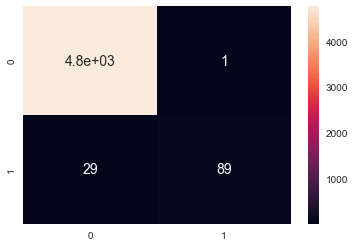

In [17]:
cf_matrix = confusion_matrix(y_test,result)
sns.heatmap(cf_matrix, annot=True)

In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print('Accuracy score  is {}'.format(accuracy_score(y_test,y_pred)))
print('F1 score  is {}'.format(f1_score(y_test,y_pred)))

Accuracy score  is 0.9895641497851443
F1 score  is 0.7559808612440192


<AxesSubplot:>

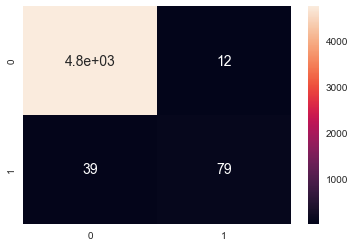

In [19]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

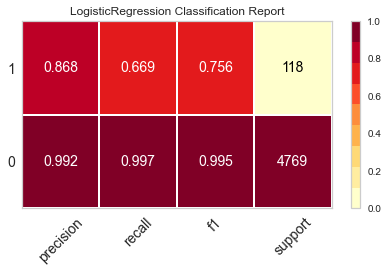

In [20]:
visualizer = ClassificationReport(lr, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print('Accuracy score  is {}'.format(accuracy_score(y_test,y_pred)))
print('F1 score  is {}'.format(f1_score(y_test,y_pred)))

Accuracy score  is 0.9946797626355638
F1 score  is 0.8796296296296297


<AxesSubplot:>

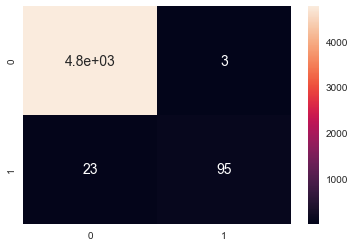

In [22]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)